# Unsupervised Learning : DBSCAN

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

## Data Collection

In [2]:
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

## Exploratory Data Analysis (EDA)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  300 non-null    float64
 1   Feature2  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB
None

Dataset Description:
         Feature1    Feature2
count  300.000000  300.000000
mean     0.500413    0.253196
std      0.871355    0.496069
min     -1.104663   -0.563235
25%     -0.063124   -0.197303
50%      0.485312    0.248550
75%      1.047578    0.713130
max      2.131198    1.107772


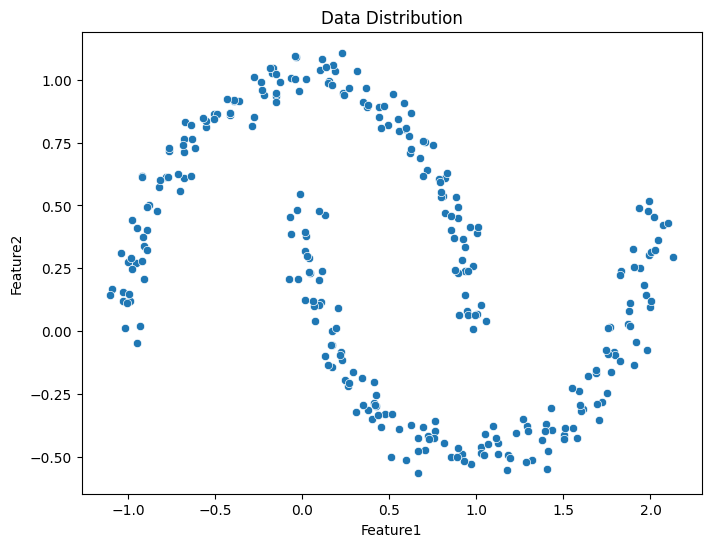

In [3]:
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Feature1'], y=df['Feature2'])
plt.title('Data Distribution')
plt.show()

## Data Pre-processing

In [4]:
# 2. Preprocessing (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 0.14036805, -1.26261004],
       [ 1.6138101 , -0.78648207],
       [-0.65506683,  0.40974193],
       [ 0.49831585, -0.03172773],
       [ 0.78163614, -1.50238304],
       [ 0.60351879, -1.44510991],
       [-0.1016528 , -1.08869165],
       [-1.2795416 ,  0.96234329],
       [ 0.51469381, -0.35056944],
       [-0.37839921, -0.508059  ],
       [ 0.90999548, -1.2731531 ],
       [-0.14737481,  1.29038727],
       [ 0.4780283 , -1.49674634],
       [ 0.14468974,  1.23744228],
       [-0.37849628, -0.62345738],
       [ 0.54157202, -1.57634013],
       [ 1.71589921,  0.10172459],
       [ 0.25286878, -1.35158782],
       [-1.64193504, -0.46794824],
       [-0.44174109, -0.02989885],
       [-0.64665525,  1.52025111],
       [-1.47549521,  0.72690369],
       [ 1.15155453, -1.34380914],
       [ 1.16073864, -1.28995771],
       [-1.34784573,  1.16587176],
       [ 0.12843377,  1.06024434],
       [ 1.59072333, -0.28352305],
       [ 1.80945897,  0.34123487],
       [-0.53116554,

## Model From Scratch

In [5]:
# 3. Implementasi DBSCAN dari Scratch
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def region_query(X, point_idx, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean_distance(X[point_idx], X[i]) < eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(X, labels, point_idx, cluster_id, eps, min_samples):
    neighbors = region_query(X, point_idx, eps)
    if len(neighbors) < min_samples:
        labels[point_idx] = -1  # Noise
        return False

    labels[point_idx] = cluster_id
    queue = neighbors.copy()

    while queue:
        current_point = queue.pop(0)
        if labels[current_point] == -1:
            labels[current_point] = cluster_id
        if labels[current_point] != 0:
            continue
        labels[current_point] = cluster_id
        new_neighbors = region_query(X, current_point, eps)
        if len(new_neighbors) >= min_samples:
            queue.extend(new_neighbors)
    return True

def dbscan(X, eps, min_samples):
    labels = np.zeros(len(X), dtype=int)
    cluster_id = 0
    for i in range(len(X)):
        if labels[i] == 0:
            if expand_cluster(X, labels, i, cluster_id + 1, eps, min_samples):
                cluster_id += 1
    return labels

## Running and Evaluation

Estimated number of clusters: 2
Estimated number of noise points: 0


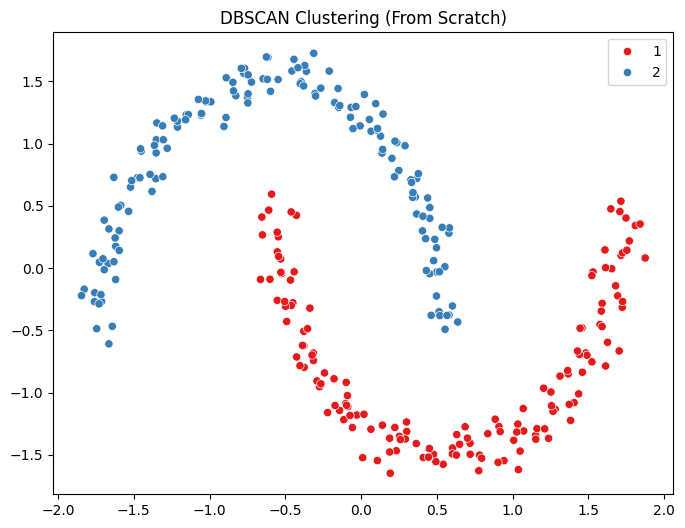

In [6]:
# 4. Jalankan DBSCAN
labels = dbscan(X_scaled, eps=0.3, min_samples=5)

# 5. Evaluasi hasil clustering
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

# 6. Visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='Set1', legend='full')
plt.title('DBSCAN Clustering (From Scratch)')
plt.show()

## DBSCAN with Library

Estimated number of clusters: 2
Estimated number of noise points: 0


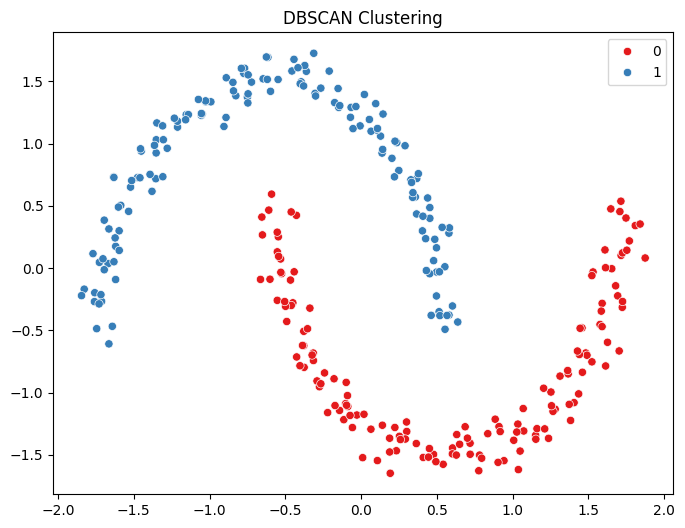

In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='Set1', legend='full')
plt.title('DBSCAN Clustering')
plt.show()